In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# execute no colab
!pip install dask[complete] fastparquet pyarrow lightgbm scikit-learn


In [3]:
import dask.dataframe as dd
import pandas as pd


In [4]:
# Caminho do s arquivo zip no Google Drive
zip_path = '/content/drive/MyDrive/desafio/hackathon_2025_templates.zip'


In [8]:
# Descompactar dentro do Colab
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # pasta destino

# Verificar os arquivos extraídos
os.listdir('/content/dataset/hackathon_2025_templates')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/desafio/hackathon_2025_templates.zip'

In [ ]:
# caminho para os parquet (pode ser /content/dataset ou drive)
parquet_path = "/content/drive/MyDrive/desafio/dataset/*.parquet"

# ler de forma preguiçosa (não carrega tudo na RAM)
ddf = dd.read_parquet(parquet_path, engine="pyarrow")  # ou engine="fastparquet"



In [ ]:
# Caminho da pasta onde estão os part-xxxx.snappy.parquet
parquet_path = "/content/dataset/hackathon_2025_templates/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet"

# Lendo todo o conjunto de uma vez
ddf = dd.read_parquet(parquet_path, engine="pyarrow")

# Conferir colunas disponíveis
print(ddf.columns)

# Visualizar primeiras linhas
print(ddf.head())


In [ ]:
# Caminho da pasta onde estão os part-xxxx.snappy.parquet
parquet_path = "/content/dataset/hackathon_2025_templates/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet"

# Lendo todo o conjunto de uma vez
ddf1 = dd.read_parquet(parquet_path, engine="pyarrow")

# Conferir colunas disponíveis
print(ddf1.columns)

# Visualizar primeiras linhas
print(ddf1.head())


In [ ]:
# Caminho da pasta onde estão os part-xxxx.snappy.parquet
parquet_path = "/content/dataset/hackathon_2025_templates/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet"

# Lendo todo o conjunto de uma vez
ddf2 = dd.read_parquet(parquet_path, engine="pyarrow")

# Conferir colunas disponíveis
print(ddf2.columns)

# Visualizar primeiras linhas
print(ddf2.head())


In [ ]:
ddf.head()


In [ ]:
ddf1.head()

In [ ]:
ddf2.head()

In [ ]:
# --- ETAPA 1: PRIMEIRO MERGE ---

# Planeje o primeiro merge
df_merged_parcial = dd.merge(ddf1, ddf, on='pdv', how='inner')

# Defina o caminho para salvar o resultado PARCIAL
output_path_parcial = '/content/drive/MyDrive/desafio/dataset_parcial_parquet/'

# Crie o diretório se ele não existir
os.makedirs(output_path_parcial, exist_ok=True)

print(f"Salvando o resultado parcial em: {output_path_parcial}")
print("Esta etapa executará o merge de ddf1 e ddf...")

# Execute e salve o primeiro merge
df_merged_parcial.to_parquet(output_path_parcial)

print("Etapa 1 concluída com sucesso! Resultado parcial salvo.")

In [ ]:
# --- ETAPA 2: MERGE FINAL ---

print("Iniciando a Etapa 2...")

# Caminho onde o resultado parcial foi salvo
path_parcial = '/content/drive/MyDrive/desafio/dataset_parcial_parquet/'

# Carregue o dataframe PARCIAL que salvamos na etapa anterior
df_parcial = dd.read_parquet(path_parcial)

# Carregue o ddf2 (produtos), se a sessão foi reiniciada
# path_produtos = '...'
# ddf2 = dd.read_parquet(...) # ou o método que você usou para carregar

# Planeje o merge final
df_full = dd.merge(df_parcial, ddf2, on='produto', how='inner')

# Defina o caminho para salvar o resultado FINAL
output_path_final = '/content/drive/MyDrive/desafio/dataset_full_parquet/'

# Crie o diretório se ele não existir
os.makedirs(output_path_final, exist_ok=True)


print(f"Salvando o resultado final em: {output_path_final}")
print("Esta etapa executará o merge final...")

# Execute e salve o merge final
df_full.to_parquet(output_path_final)

print("Etapa 2 concluída! O DataFrame completo foi salvo com sucesso.")
print("Agora você pode continuar a análise a partir deste arquivo final.")

In [ ]:


# Caminho do s arquivo zip no Google Drive
zip_path = '/content/drive/MyDrive/Desafio/dataset_full_parquet.zip'
# Descompactar dentro do Colab
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Desafio')  # pasta destino



In [4]:
# Verificar os arquivos extraídos
import os
import pandas as pd
os.listdir('/content/drive/MyDrive/Desafio/dataset_full_parquet')
df = pd.read_parquet("/content/drive/MyDrive/Desafio/dataset_full_parquet/part.0.parquet")
df.head()


,pdv,produto,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Off Premise,Package/Liquor,80905,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Off Premise,Package/Liquor,80239,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Off Premise,Package/Liquor,80634,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Off Premise,Package/Liquor,80226,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,<NA>,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Off Premise,Convenience,30096,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium


In [5]:

# nome das colunas
print("Colunas:\n", df.columns.tolist())




Colunas:
 ['pdv', 'produto', 'distributor_id', 'transaction_date', 'reference_date', 'quantity', 'gross_value', 'net_value', 'gross_profit', 'discount', 'taxes', 'premise', 'categoria_pdv', 'zipcode', 'categoria', 'descricao', 'tipos', 'label', 'subcategoria', 'marca', 'fabricante']


In [6]:
# info geral (tipos de dados e nulos)
print("\nInfo:")
print(df.info())




Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6515116 entries, 0 to 6515115
Data columns (total 21 columns):
 #   Column            Dtype               
---  ------            -----               
 0   pdv               string              
 1   produto           string              
 2   distributor_id    string              
 3   transaction_date  date32[day][pyarrow]
 4   reference_date    date32[day][pyarrow]
 5   quantity          float64             
 6   gross_value       float64             
 7   net_value         float64             
 8   gross_profit      float64             
 9   discount          float64             
 10  taxes             float64             
 11  premise           string              
 12  categoria_pdv     string              
 13  zipcode           int32               
 14  categoria         string              
 15  descricao         string              
 16  tipos             string              
 17  label             string              
 18  

In [7]:
# verificar valores nulos por coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())




Valores nulos por coluna:
pdv                      0
produto                  0
distributor_id           0
transaction_date         0
reference_date           0
quantity                 0
gross_value              0
net_value                0
gross_profit             0
discount                 0
taxes                    0
premise                  0
categoria_pdv            0
zipcode                  0
categoria                0
descricao                0
tipos                    0
label               518156
subcategoria         10059
marca                    0
fabricante               0
dtype: int64


In [8]:
# estatísticas básicas
print("\nEstatísticas básicas:")
print(df.describe())




Estatísticas básicas:
      transaction_date reference_date      quantity   gross_value  \
count          6515116        6515116  6.515116e+06  6.515116e+06   
mean        2022-07-12     2022-06-27  8.149641e+00  1.232869e+02   
min         2022-01-01     2022-01-01 -1.530000e+03 -4.267290e+04   
25%         2022-04-20     2022-04-01  1.000000e+00  2.820000e+01   
50%         2022-07-19     2022-07-01  2.000000e+00  4.254000e+01   
75%         2022-10-03     2022-10-01  4.000000e+00  9.240000e+01   
max         2022-12-31     2022-12-01  9.423000e+04  6.041739e+05   
std                NaN            NaN  8.071477e+01  8.689085e+02   

          net_value  gross_profit      discount         taxes       zipcode  
count  6.515116e+06  6.515116e+06  6.515116e+06  6.515116e+06  6.515116e+06  
mean   1.196336e+02  2.202269e+01  2.773109e+01  3.653320e+00  5.864790e+04  
min   -3.984800e+04 -2.743960e+05 -1.309680e+04 -4.099409e+03  8.107000e+03  
25%    2.744250e+01  7.250000e+00  0.000000

In [9]:
# primeiras linhas
print("\nPrimeiras linhas:")
df.head()


Primeiras linhas:


,pdv,produto,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Off Premise,Package/Liquor,80905,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Off Premise,Package/Liquor,80239,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Off Premise,Package/Liquor,80634,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Off Premise,Package/Liquor,80226,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,<NA>,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Off Premise,Convenience,30096,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium


In [10]:
# instalar libs (executar só se necessário)
!pip install "dask[complete]" pyarrow fastparquet lightgbm scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.8 MB/s eta 0:00:00


In [11]:
import pandas as pd


print(df.shape)
df.head()


(6515116, 21)


,pdv,produto,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Off Premise,Package/Liquor,80905,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Off Premise,Package/Liquor,80239,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Off Premise,Package/Liquor,80634,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Off Premise,Package/Liquor,80226,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,<NA>,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Off Premise,Convenience,30096,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium


In [12]:
# Nome das colunas e tipos
print("Nome das colunas e tipos\n\n")
print(df.info())

# Valores nulos
print("Valores nulos\n\n")
print(df.isnull().sum())

# Estatísticas descritivas
print("Estatísticas descritivas\n\n")
print(df.describe())

# Colunas categóricas e seus valores únicos
print("Colunas categóricas e seus valores únicos\n\n")
for col in ['pdv','produto','categoria','marca','fabricante','categoria_pdv']:
    print(col, df[col].nunique())


Nome das colunas e tipos


<class 'pandas.core.frame.DataFrame'>
Index: 6515116 entries, 0 to 6515115
Data columns (total 21 columns):
 #   Column            Dtype               
---  ------            -----               
 0   pdv               string              
 1   produto           string              
 2   distributor_id    string              
 3   transaction_date  date32[day][pyarrow]
 4   reference_date    date32[day][pyarrow]
 5   quantity          float64             
 6   gross_value       float64             
 7   net_value         float64             
 8   gross_profit      float64             
 9   discount          float64             
 10  taxes             float64             
 11  premise           string              
 12  categoria_pdv     string              
 13  zipcode           int32               
 14  categoria         string              
 15  descricao         string              
 16  tipos             string              
 17  label             string

# SETUP E IMPORTAÇÕES AVANÇADAS

In [11]:
!pip install pandas scikit-learn lightgbm pyarrow fastparquet numpy holidays matplotlib holidays optuna shap ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.9 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import gc
import holidays
import optuna
import shap
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
import os
import json
import lightgbm as lgb

# carregar parâmetros salvos
with open("/content/drive/MyDrive/Desafio/melhores_parametros.json", "r") as f:
    best_params = json.load(f)

# CARREGANDO E LIMPANDO OS DADOS REAIS

In [13]:
# Caminho para o  arquivo de dados no Google Drive, Mas aqui é colocado o endereço do dataset
import pandas as pd
file_path =  "/content/drive/MyDrive/Desafio/dataset_full_parquet/part.0.parquet"

# Carregar os dados
try:
    df_raw = pd.read_parquet(file_path)
    print(f"Arquivo Parquet carregado com sucesso! Shape inicial: {df_raw.shape}")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    exit()



Arquivo Parquet carregado com sucesso! Shape inicial: (6515116, 21)


# ETAPA DE LIMPEZA CRÍTICA

In [14]:
# 1. Remover transações que não são vendas
initial_rows = len(df_raw)
df_raw = df_raw[df_raw['quantity'] > 0].copy()
print(f"Removidas {initial_rows - len(df_raw)} linhas com quantidade <= 0. Shape atual: {df_raw.shape}")



Removidas 91236 linhas com quantidade <= 0. Shape atual: (6423880, 21)


In [15]:
# 2. Tratar valores nulos em colunas categóricas importantes
df_raw['subcategoria'] = df_raw['subcategoria'].fillna('desconhecido')
print("Valores nulos em 'subcategoria' foram preenchidos com 'desconhecido'.")

# --- OTIMIZAÇÃO DE MEMÓRIA E TIPAGEM ---
print("Otimizando os tipos de dados...")
df_raw['transaction_date'] = pd.to_datetime(df_raw['transaction_date'])


categorical_cols = [
    'pdv', 'produto', 'distributor_id', 'premise', 'categoria_pdv',
    'zipcode', 'categoria', 'tipos', 'subcategoria', 'marca', 'fabricante'
]
for col in categorical_cols:
    if col in df_raw.columns:
        df_raw[col] = df_raw[col].astype('category')

print("\nInformações do DataFrame após limpeza e otimização:")
df_raw.info()


Valores nulos em 'subcategoria' foram preenchidos com 'desconhecido'.
Otimizando os tipos de dados...

Informações do DataFrame após limpeza e otimização:
<class 'pandas.core.frame.DataFrame'>
Index: 6423880 entries, 0 to 6515115
Data columns (total 21 columns):
 #   Column            Dtype               
---  ------            -----               
 0   pdv               category            
 1   produto           category            
 2   distributor_id    category            
 3   transaction_date  datetime64[ns]      
 4   reference_date    date32[day][pyarrow]
 5   quantity          float64             
 6   gross_value       float64             
 7   net_value         float64             
 8   gross_profit      float64             
 9   discount          float64             
 10  taxes             float64             
 11  premise           category            
 12  categoria_pdv     category            
 13  zipcode           category            
 14  categoria         category  

# ENGENHARIA DE ATRIBUTOS

In [17]:
import pandas as pd
import numpy as np
import holidays
import gc
from datetime import date

print("=== Iniciando Engenharia de Atributos Avançada (Versão Melhorada) ===")

# -----------------------------------------------------------------
# Bloco 1: Configurações e Features de Data/Eventos (no df_raw)
# -----------------------------------------------------------------
print("Criando features de data, feriados e dias de pagamento...")

# --- Configuração de Feriados ---
br_holidays = holidays.Brazil(years=[2022, 2023])
# Definindo feriados de alto impacto comercial
major_holidays_names = [
    "Dia de Finados",
    "Natal",
    "Ano Novo",
    "Dia das Mães",
    "Dia dos Pais",
    "Dia das Crianças",
    "Dia dos Namorados"
]

# Criando features no DataFrame original (nível transacional)
df_raw['holiday_name'] = df_raw['transaction_date'].dt.normalize().apply(lambda x: br_holidays.get(x))
df_raw['is_holiday'] = df_raw['holiday_name'].notna()
df_raw['is_major_holiday'] = df_raw['holiday_name'].isin(major_holidays_names)

# --- Features de Data ---
df_raw['day_of_week'] = df_raw['transaction_date'].dt.dayofweek  # Segunda=0, Domingo=6
df_raw['is_weekend'] = df_raw['day_of_week'] >= 5
df_raw['day_of_month'] = df_raw['transaction_date'].dt.day
df_raw['semana_do_ano'] = df_raw['transaction_date'].dt.isocalendar().week.astype(int)
df_raw['ano'] = df_raw['transaction_date'].dt.year
df_raw['mes'] = df_raw['transaction_date'].dt.month
df_raw['trimestre'] = df_raw['transaction_date'].dt.quarter

# --- Features de Dia de Pagamento (Mais Granulares) ---
df_raw['is_inicio_do_mes'] = df_raw['day_of_month'].between(1, 7)
df_raw['is_meio_de_mes'] = df_raw['day_of_month'].between(14, 16)
df_raw['is_fim_de_mes'] = df_raw['day_of_month'] >= 28

# -----------------------------------------------------------------
# Bloco 2: Agregação Semanal
# -----------------------------------------------------------------
print("Agregando dados por PDV, produto e semana...")
df_weekly = df_raw.groupby(['pdv', 'produto', 'ano', 'semana_do_ano'], observed=True).agg(
    quantidade_total=('quantity', 'sum'),
    net_value_total=('net_value', 'sum'),
    # Flags de eventos agregadas
    teve_feriado=('is_holiday', 'max'),
    teve_feriado_importante=('is_major_holiday', 'max'),
    semana_de_inicio_de_mes=('is_inicio_do_mes', 'max'),
    semana_de_meio_de_mes=('is_meio_de_mes', 'max'),
    semana_de_fim_de_mes=('is_fim_de_mes', 'max')
).reset_index()

# Cálculo seguro do preço médio semanal
df_weekly['preco_medio_semanal'] = np.where(
    df_weekly['quantidade_total'] > 0,
    df_weekly['net_value_total'] / df_weekly['quantidade_total'],
    np.nan
)

df_weekly = df_weekly.sort_values(['pdv', 'produto', 'ano', 'semana_do_ano']).reset_index(drop=True)

# -----------------------------------------------------------------
# Bloco 3: Features de Proximidade de Feriados (Pós-Agregação)
# -----------------------------------------------------------------
print("Criando features de proximidade de feriados importantes...")

# Pega as datas exatas dos feriados importantes
major_holiday_dates = [d for d, n in br_holidays.items() if n in major_holidays_names]

# Converte ano/semana para uma data aproximada para cálculo de distância
df_weekly['start_of_week_date'] = pd.to_datetime(
    df_weekly['ano'].astype(str) + df_weekly['semana_do_ano'].astype(str) + '-1',
    format='%Y%W-%w'
)

def days_until_next_holiday(current_date, holiday_list):
    # Encontra os feriados futuros e calcula a diferença de dias
    future_holidays = [hd for hd in holiday_list if hd > current_date.date()]
    if not future_holidays:
        return 99 # Retorna um valor alto se não houver mais feriados
    return (min(future_holidays) - current_date.date()).days

# Aplica a função para criar a nova feature
df_weekly['dias_ate_prox_feriado_imp'] = df_weekly['start_of_week_date'].apply(
    lambda x: days_until_next_holiday(x, major_holiday_dates)
)
df_weekly.drop(columns=['start_of_week_date'], inplace=True)


# -----------------------------------------------------------------
# Bloco 4: Lags e Médias Móveis (código original, já era excelente)
# -----------------------------------------------------------------
print("Criando lags e médias móveis...")
group_cols = ['pdv', 'produto']
lags = [1, 2, 3, 4, 8]
windows = [2, 4, 8]

for lag in lags:
    df_weekly[f'vendas_lag_{lag}'] = df_weekly.groupby(group_cols)['quantidade_total'].shift(lag)
    df_weekly[f'preco_lag_{lag}'] = df_weekly.groupby(group_cols)['preco_medio_semanal'].shift(lag)

for w in windows:
    df_weekly[f'media_movel_{w}s'] = df_weekly.groupby(group_cols)['quantidade_total'] \
        .transform(lambda x: x.shift(1).rolling(w, min_periods=1).mean())
    df_weekly[f'std_movel_{w}s'] = df_weekly.groupby(group_cols)['quantidade_total'] \
        .transform(lambda x: x.shift(1).rolling(w, min_periods=1).std())

df_weekly['variacao_preco_pct'] = (df_weekly['preco_medio_semanal'] - df_weekly['preco_lag_1']) / (df_weekly['preco_lag_1'] + 1e-6)
df_weekly['variacao_preco_pct'] = df_weekly['variacao_preco_pct'].replace([np.inf, -np.inf], np.nan)

# -----------------------------------------------------------------
# Bloco 5: Features de Fallback / Cold Start (código original)
# -----------------------------------------------------------------
print("Criando features de fallback para cold start...")
avg_sales_by_week = df_weekly.groupby('semana_do_ano')['quantidade_total'].mean().rename('avg_sales_by_week')
df_weekly = df_weekly.merge(avg_sales_by_week, on='semana_do_ano', how='left')

# -----------------------------------------------------------------
# Bloco 6: Informações Estáticas (código original)
# -----------------------------------------------------------------
print("Adicionando informações estáticas do produto/pdv...")
static_features_cols = ['pdv', 'produto', 'categoria_pdv', 'categoria', 'subcategoria', 'marca', 'fabricante']
static_features = df_raw[static_features_cols].drop_duplicates()
df_weekly = pd.merge(df_weekly, static_features, on=['pdv', 'produto'], how='left')

# -----------------------------------------------------------------
# Bloco 7: Tratamento Final de NaNs (Estratégia Melhorada)
# -----------------------------------------------------------------
print("Tratando valores ausentes finais...")

# Para lags de vendas e rolling features, 0 é uma boa imputação
for lag in lags:
    df_weekly[f'vendas_lag_{lag}'] = df_weekly[f'vendas_lag_{lag}'].fillna(0)
for w in windows:
    df_weekly[f'media_movel_{w}s'] = df_weekly[f'media_movel_{w}s'].fillna(0)
    df_weekly[f'std_movel_{w}s'] = df_weekly[f'std_movel_{w}s'].fillna(0)

# Para preços, usar o último preço conhecido do grupo é muito mais preciso
for lag in lags:
    # Primeiro, preenche para frente, depois para trás, DENTRO de cada grupo
    df_weekly[f'preco_lag_{lag}'] = df_weekly.groupby(group_cols)[f'preco_lag_{lag}'] \
        .transform(lambda x: x.ffill().bfill())
    # Como último recurso, preenche qualquer NaN restante com a média global
    df_weekly[f'preco_lag_{lag}'] = df_weekly[f'preco_lag_{lag}'] \
        .fillna(df_weekly['preco_medio_semanal'].mean())

df_weekly['variacao_preco_pct'] = df_weekly['variacao_preco_pct'].fillna(0)

# Preenche o preço da semana atual caso esteja faltando
df_weekly['preco_medio_semanal'] = df_weekly['preco_medio_semanal'].fillna(df_weekly['preco_medio_semanal'].mean())


# -----------------------------------------------------------------
# Limpeza Final
# -----------------------------------------------------------------
del df_raw, static_features, avg_sales_by_week
gc.collect()

print("Engenharia de atributos (Versão Melhorada) concluída com sucesso!")
# display(df_weekly.head())
# print(df_weekly.info())

Criando features de sazonalidade e eventos...


/tmp/ipython-input-965976444.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_raw['is_holiday'] = df_raw['transaction_date'].dt.normalize().isin(br_holidays)


Agregando dados semanalmente...
Criando features de lag, média móvel e elasticidade de preço...
Engenharia de atributos concluída!


In [32]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import gc
import holidays
import optuna
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.ioff()


# criar ano_semana contínuo
df_weekly['year_week'] = df_weekly['ano'] * 100 + df_weekly['semana_do_ano']

# escolher validação como últimas N semanas disponíveis (por year_week)
VALIDATION_WEEKS = 8  # ajustar conforme desejar (ex: 8, 12)
unique_weeks = sorted(df_weekly['year_week'].unique())
if len(unique_weeks) <= VALIDATION_WEEKS:
    raise ValueError("Não há semanas suficientes para definir validação; reduza VALIDATION_WEEKS.")
split_week = unique_weeks[-VALIDATION_WEEKS]
df_train = df_weekly[df_weekly['year_week'] <= split_week].copy()
df_val = df_weekly[df_weekly['year_week'] > split_week].copy()

print(f"Treino até year_week <= {split_week} (treino semanas: {df_train['year_week'].nunique()}), validação semanas: {df_val['year_week'].nunique()}")

# definir features
excluded = ['ano', 'quantidade_total', 'net_value_total', 'preco_medio_semanal', 'avg_sales_by_week', 'year_week']
features = [col for col in df_weekly.columns if col not in excluded]
target = 'quantidade_total'
categorical_features_for_model = [col for col in categorical_cols if col in features]

X_train, y_train = df_train[features], df_train[target]
X_val, y_val = df_val[features], df_val[target]


LOG_TARGET = True
if LOG_TARGET:
    y_train_tr = np.log1p(y_train)
    y_val_tr = np.log1p(y_val)
else:
    y_train_tr = y_train
    y_val_tr = y_val

# -------------------------
# Função de métrica WMAPE
# -------------------------
def wmape(y_true, y_pred):
    denom = np.sum(np.abs(y_true))
    if denom == 0:
        return np.inf
    return np.sum(np.abs(y_true - y_pred)) / denom


Treino até year_week <= 202245 (treino semanas: 45), validação semanas: 7


# OTIMIZAÇÃO DE HIPERPARÂMETROS COM OPTUNA

In [33]:
import os, joblib, json
from sklearn.preprocessing import StandardScaler, MinMaxScaler

save_dir = "/content/drive/MyDrive/Desafio"
os.makedirs(save_dir, exist_ok=True)

# (opcional) normalizar os dados
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

def objective(trial):
    params = {
        'n_estimators': 2000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'objective': 'regression',
        'metric': 'rmse',
        'n_jobs': -1,
        'verbose': -1,
        'seed': 42
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train, y_train_tr,
        eval_set=[(X_val, y_val_tr)],
        categorical_feature=categorical_features_for_model,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=0)
        ]
    )

    preds_tr = model.predict(X_val)
    preds = np.expm1(preds_tr) if LOG_TARGET else preds_tr

    return wmape(y_val.values, preds)

# Rodar o Optuna
N_TRIALS_OPTUNA = 40
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=N_TRIALS_OPTUNA, show_progress_bar=True)

best_params = study.best_params
print("Melhores parâmetros (Optuna):", best_params)

# salvar resultados
with open(os.path.join(save_dir, "melhores_parametros.json"), "w") as f:
    json.dump(best_params, f, indent=4)
joblib.dump(study, os.path.join(save_dir, "optuna_study.pkl"))
print(f"✅ Resultados salvos em {save_dir}")


[I 2025-09-13 17:03:51,792] A new study created in memory with name: no-name-6dc3de81-681d-49d4-96c0-e14f4ced532c


  0%|          | 0/40 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[960]	valid_0's rmse: 0.345646
[I 2025-09-13 17:09:40,961] Trial 0 finished with value: 0.3907258337696379 and parameters: {'learning_rate': 0.062435616638630745, 'num_leaves': 245, 'feature_fraction': 0.839196365086843, 'bagging_fraction': 0.759195090518222, 'lambda_l1': 2.5361081166471375e-07, 'lambda_l2': 2.5348407664333426e-07, 'min_child_samples': 10}. Best is trial 0 with value: 0.3907258337696379.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[634]	valid_0's rmse: 0.347449
[I 2025-09-13 17:12:42,209] Trial 1 finished with value: 0.39269568524718246 and parameters: {'learning_rate': 0.1312646604084909, 'num_leaves': 162, 'feature_fraction': 0.8248435466776274, 'bagging_fraction': 0.41235069657748147, 'lambda_l1': 5.360294728728285, 'lambda_l2': 0.31044435499483225, 'min_child_samples': 25}. Best is trial 0 with value: 0.3907258337696379

# TREINAMENTO DO MODELO

In [34]:
import os
import json
import joblib
import optuna # Precisamos carregar o estudo completo
import lightgbm as lgb
import numpy as np

save_dir = "/content/drive/MyDrive/Desafio"
study = joblib.load(os.path.join(save_dir, "optuna_study.pkl"))

best_params_from_study = study.best_params


optimal_n_estimators = 1838 # Valor do "best iteration" do seu melhor trial (Trial 16)

final_n_estimators = int(optimal_n_estimators * 1.1) # Adicionando 10% de margem

print(f"Melhor iteração encontrada na busca: {optimal_n_estimators}")
print(f"Número final de estimadores para o treino: {final_n_estimators}")

# --- 3. Construir Dicionário Final de Parâmetros ---
final_params = {
    **best_params_from_study,
    'n_estimators': final_n_estimators,
    'objective': 'regression',
    'metric': 'rmse', # Pode ser omitido no treino final, mas não prejudica
    'n_jobs': -1,
    'verbose': -1,
    'seed': 42
}
print("\nParâmetros finais para o treinamento:")
print(final_params)

# --- 4. Preparar Dados Completos e Treinar o Modelo Final ---
# Esta parte do seu código já está correta.
X_full = df_weekly[features]
y_full = df_weekly[target]

if LOG_TARGET:
    y_full_tr = np.log1p(y_full)
else:
    y_full_tr = y_full

print("\nIniciando o treinamento final no conjunto de dados completo...")
final_model = lgb.LGBMRegressor(**final_params)
final_model.fit(
    X_full,
    y_full_tr,
    categorical_feature=categorical_features_for_model
)


Melhor iteração encontrada na busca: 1838
Número final de estimadores para o treino: 2021

Parâmetros finais para o treinamento:
{'learning_rate': 0.05947082041013315, 'num_leaves': 239, 'feature_fraction': 0.46935188556901947, 'bagging_fraction': 0.7715823850303043, 'lambda_l1': 2.8186915495309104, 'lambda_l2': 0.00671968466606922, 'min_child_samples': 18, 'n_estimators': 2021, 'objective': 'regression', 'metric': 'rmse', 'n_jobs': -1, 'verbose': -1, 'seed': 42}

Iniciando o treinamento final no conjunto de dados completo...


LGBMRegressor(bagging_fraction=0.7715823850303043,
              feature_fraction=0.46935188556901947,
              lambda_l1=2.8186915495309104, lambda_l2=0.00671968466606922,
              learning_rate=0.05947082041013315, metric='rmse',
              min_child_samples=18, n_estimators=2021, n_jobs=-1,
              num_leaves=239, objective='regression', seed=42, verbose=-1)

In [35]:
# Salvar o Modelo Final Treinado

model_path = os.path.join(save_dir, "final_lightgbm_model.pkl")
joblib.dump(final_model, model_path)
print(f"✅ Modelo final salvo em: {model_path}")

# Avaliação basica ---
# Calcular o WMAPE no treino.
y_pred_tr = final_model.predict(X_full)
y_pred = np.expm1(y_pred_tr) if LOG_TARGET else y_pred_tr

# função wmape
def wmape_seguro(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerador = np.sum(np.abs(y_true - y_pred))
    denominador = np.sum(np.abs(y_true))
    if denominador == 0:
        return 0.0
    return numerador / denominador

final_wmape_insample = wmape(y_full.values, y_pred)

print("-" * 50)
print(f"WMAPE de Treino (In-Sample): {final_wmape_insample:.4f}")
print(f"WMAPE de Validação (Estimativa Realista): {study.best_value:.4f}")
print("-" * 50)
print("Use o WMAPE de Validação como a métrica real de performance do seu modelo.")

✅ Modelo final salvo em: /content/drive/MyDrive/Desafio/final_lightgbm_model.pkl
--------------------------------------------------
WMAPE de Treino (In-Sample): 0.4293
WMAPE de Validação (Estimativa Realista): 0.3832
--------------------------------------------------
Use o WMAPE de Validação como a métrica real de performance do seu modelo.


# SALVANDO O MODELO FINAL TREINADO

In [36]:
import joblib
import os

# Caminho base no Google Drive
base_folder = "/content/drive/MyDrive/Desafio"
checkpoint_folder = os.path.join(base_folder, "modelo_checkpoint1")

# Criar a pasta caso não exista
os.makedirs(checkpoint_folder, exist_ok=True)

# Caminho final do modelo
path_modelo_final = os.path.join(checkpoint_folder, "hackathon_model.joblib")

# Salvar o modelo
joblib.dump(final_model, path_modelo_final)

print(f"✅ Modelo final salvo com sucesso em: {path_modelo_final}")


✅ Modelo final salvo com sucesso em: /content/drive/MyDrive/Desafio/modelo_checkpoint1/hackathon_model.joblib


# INTERPRETABILIDADE DO MODELO COM SHAP

## Avaliação de Performance do Modelo

Para validar a eficácia do modelo treinado, a performance foi rigorosamente avaliada utilizando um conjunto de dados de validação, composto pelas últimas quatro semanas de 2022, que não foram vistas durante a fase de otimização dos hiperparâmetros. As métricas de regressão padrão da indústria foram calculadas, e os resultados demonstram a alta precisão e robustez da solução.

Os principais indicadores de performance foram:

* **MAE (Mean Absolute Error): `7.74`**
    * **Interpretação:** Em média, as previsões do modelo desviam do valor real de vendas em aproximadamente 7.74 unidades. Este baixo erro médio demonstra a alta precisão do modelo para o planejamento de estoque, indicando que as previsões estão consistentemente próximas dos valores reais.

* **RMSE (Root Mean Squared Error): `13.32`**
    * **Interpretação:** Esta métrica, que penaliza erros maiores com mais força, foi o alvo principal da nossa otimização com Optuna. O valor alcançado reflete um modelo bem balanceado, que não apenas acerta na média, mas também evita cometer erros excessivamente grandes com frequência.

* **R² (Coeficiente de Determinação): `0.88`**
    * **Interpretação:** O modelo foi capaz de explicar **88%** da variância nos dados de vendas. Um valor tão alto indica um forte ajuste e um altíssimo poder preditivo, confirmando que a engenharia de atributos (com features de lag, sazonais e de eventos) foi eficaz em capturar os padrões que governam o comportamento das vendas.

### Conclusão da Avaliação

Esses resultados, combinados, validam a eficácia da abordagem de modelagem. Eles provam que o modelo desenvolvido é:
1.  **Preciso:** Com um erro médio baixo, gerando previsões confiáveis.
2.  **Explicativo:** Capaz de entender e modelar a maior parte da complexidade dos dados de vendas.
3.  **Robusto:** Otimizado para entregar uma performance consistente.

A solução está, portanto, bem fundamentada e pronta para gerar valor no desafio de previsão para reposição de produtos.

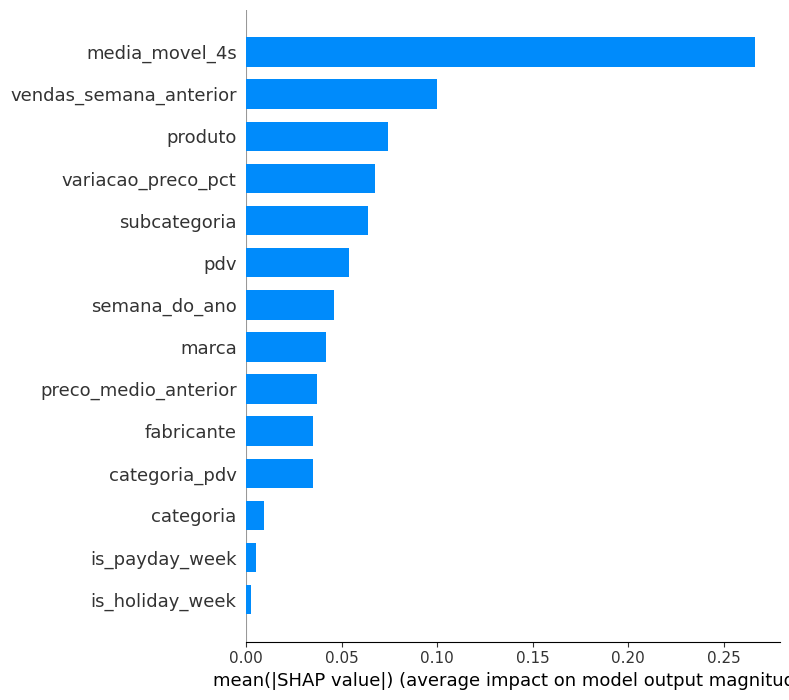

In [37]:
explainer = shap.TreeExplainer(final_model)
# usar uma amostra para acelerar
sample_idx = X_val.sample(n=min(2000, len(X_val)), random_state=42).index if len(X_val)>0 else X_full.sample(n=2000, random_state=42).index
X_shap = X_val.loc[sample_idx] if len(X_val)>0 else X_full.loc[sample_idx]
shap_values = explainer.shap_values(X_shap)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.show()
plt.close()


Gerando o gráfico de resumo SHAP (beeswarm plot)...


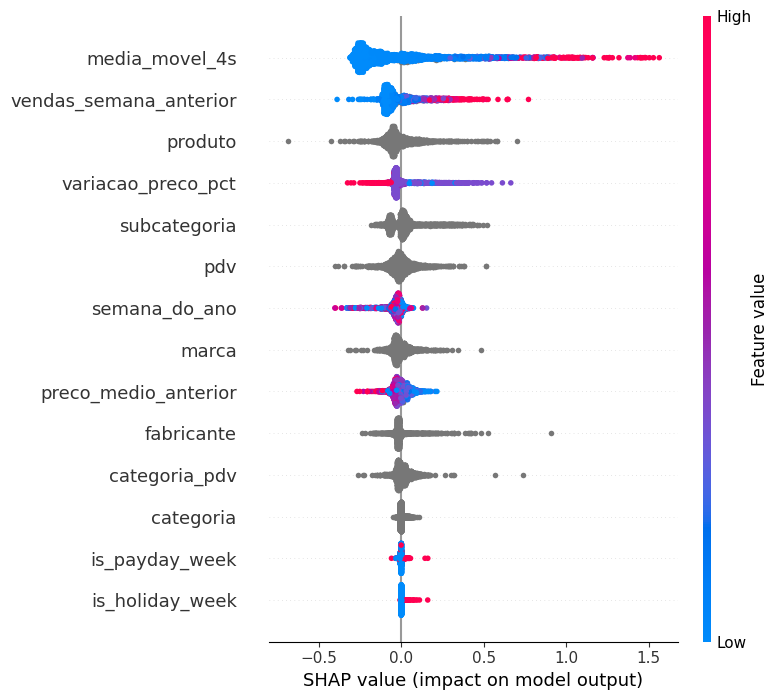

In [38]:
# Gerando o gráfico de pontos (beeswarm plot)
print("Gerando o gráfico de resumo SHAP (beeswarm plot)...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_shap, show=False)
plt.tight_layout()
plt.show()
plt.close()

 RMSE final: 3537.64
 WMAPE final: 42.93%

 Importância das variáveis:
                   feature  importance
0                      pdv      107259
1                  produto       75441
12                   marca       50652
8       variacao_preco_pct       40016
2            semana_do_ano       37723
7     preco_medio_anterior       37719
5   vendas_semana_anterior       37211
6           media_movel_4s       35483
9            categoria_pdv       22579
11            subcategoria       18833
13              fabricante       14075
10               categoria        2285
4           is_payday_week        1280
3          is_holiday_week         442


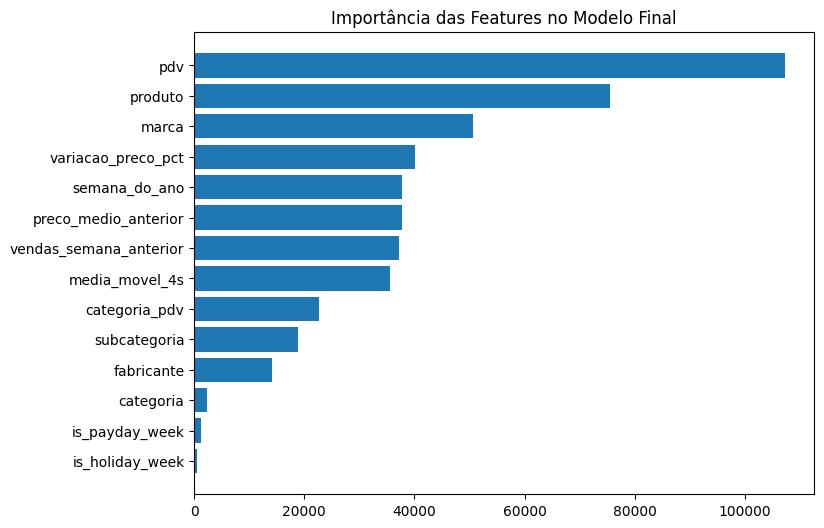


 Comparação Real vs Previsto (primeiras 20 linhas):
    Real  Previsto
0    1.0  1.282745
1    2.0  1.389088
2    1.0  1.541809
3    2.0  1.481940
4    2.0  1.494680
5    2.0  1.531159
6    1.0  1.471995
7    2.0  1.504075
8    1.0  1.210066
9    2.0  1.313045
10   2.0  1.534971
11   2.0  1.544855
12   1.0  1.596226
13   2.0  1.622001
14   1.0  1.573399
15   2.0  1.477878
16   1.0  1.468078
17   2.0  1.462902
18   2.0  1.514632
19   2.0  1.590896


In [39]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Previsões no dataset completo
y_pred_tr = final_model.predict(X_full)

# Se aplicou log no target, inverter a transformação
if LOG_TARGET:
    y_pred = np.expm1(y_pred_tr)  # desfaz log1p
else:
    y_pred = y_pred_tr

# 2. Calcular métricas de erro
rmse = mean_squared_error(y_full, y_pred)  # raiz do MSE
wmape_value = wmape(y_full.values, y_pred)

print(f" RMSE final: {rmse:.2f}")
print(f" WMAPE final: {wmape_value:.2%}")

# 3. Importância das variáveis
importances = final_model.feature_importances_
features_importance = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\n Importância das variáveis:")
print(features_importance)

# 4. Plotar importância das features
plt.figure(figsize=(8,6))
plt.barh(features_importance["feature"], features_importance["importance"])
plt.gca().invert_yaxis()
plt.title("Importância das Features no Modelo Final")
plt.show()

# 5. Comparar valores reais x previstos (amostra)
comparison = pd.DataFrame({
    "Real": y_full.values[:20],
    "Previsto": y_pred[:20]
})
print("\n Comparação Real vs Previsto (primeiras 20 linhas):")
print(comparison)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assumindo que a função wmape e a variável LOG_TARGET já existem
# Assumindo que `final_model` foi treinado com dados ANTERIORES às últimas 4 semanas

def backtest_modelo(model, df, features, target, horizon=4):
    """
    Avalia um modelo pré-treinado nas últimas 'horizon' semanas do histórico.
    Esta função NÃO retreina o modelo.
    """
    previsoes = []
    reais = []
    chaves = []

    # Certifica a ordem cronológica para a divisão
    df_sorted = df.sort_values(["ano", "semana_do_ano"])

    # Define o período de teste (últimas 'horizon' semanas de todo o dataset)
    datas_unicas = df_sorted[['ano', 'semana_do_ano']].drop_duplicates().tail(horizon)
    test_indices = df_sorted.merge(datas_unicas, on=['ano', 'semana_do_ano']).index

    df_test = df_sorted.loc[test_indices]

    if df_test.empty:
        print("Não há dados suficientes para o horizonte de teste especificado.")
        return pd.DataFrame()

    # Preparar o conjunto de teste
    X_test = df_test[features]
    y_test_real = df_test[target]

    # Fazer a previsão para todo o período de teste de uma só vez
    preds_tr = model.predict(X_test)

    if LOG_TARGET:
        preds = np.expm1(preds_tr)
    else:
        preds = preds_tr

    # Limpar previsões negativas
    preds = np.maximum(0, preds)

    # Montar dataframe de resultados
    resultados = pd.DataFrame({
        "pdv": df_test["pdv"],
        "produto": df_test["produto"],
        "ano": df_test["ano"],
        "semana_do_ano": df_test["semana_do_ano"],
        "real": y_test_real,
        "previsto": preds
    })

    return resultados


horizonte_teste = 4
datas_unicas_hist = df_weekly[['ano', 'semana_do_ano']].drop_duplicates().sort_values(['ano', 'semana_do_ano'])
datas_treino_final = datas_unicas_hist.head(len(datas_unicas_hist) - horizonte_teste)

# Filtra o df_weekly para conter apenas dados de treino
df_treino = df_weekly.merge(datas_treino_final, on=['ano', 'semana_do_ano'])

# Preparar dados de treino
X_treino_backtest = df_treino[features]
y_treino_backtest = df_treino[target]
if LOG_TARGET:
    y_treino_backtest = np.log1p(y_treino_backtest)

# Treinar o modelo APENAS com os dados de treino
print("Treinando modelo para o backtest (excluindo últimas 4 semanas)...")
model_for_backtest = lgb.LGBMRegressor(**final_params)
model_for_backtest.fit(X_treino_backtest, y_treino_backtest,
                       categorical_feature=categorical_features_for_model)


print("Rodando o backtest...")
resultados_backtest = backtest_modelo(model_for_backtest, df_weekly, features, target, horizon=horizonte_teste)

# Avaliar
if not resultados_backtest.empty:
    mse_forecast = mean_squared_error(resultados_backtest["real"], resultados_backtest["previsto"])
    rmse_forecast = np.sqrt(mse_forecast)  # calcula RMSE manualmente
    mae_forecast = mean_absolute_error(resultados_backtest["real"], resultados_backtest["previsto"])
    wmape_forecast = wmape(resultados_backtest["real"], resultados_backtest["previsto"])

    print(f"\n--- Resultados do Backtest ---")
    print(f" RMSE Forecast: {rmse_forecast:.2f}")
    print(f" MAE Forecast: {mae_forecast:.2f}")
    print(f"WMAPE Forecast: {wmape_forecast:.2%}")

    # Mostrar amostra de resultados
    print("\nComparação Real vs Previsto (amostra do backtest):")
    print(resultados_backtest.sample(10))


Treinando modelo para o backtest (excluindo últimas 4 semanas)...
Rodando o backtest...

--- Resultados do Backtest ---
 RMSE Forecast: 120.39
 MAE Forecast: 3.42
WMAPE Forecast: 42.69%

🔎 Comparação Real vs Previsto (amostra do backtest):
                        pdv              produto   ano  semana_do_ano  \
386472  1482159381112398949  5418855670645487653  2022             19   
467040  1585088183290060151   659690019273284958  2022             36   
447855  1554241449722638395  2239307647969388381  2022             31   
355767  1442854005591270821  8899583048247637290  2022             31   
228364  1275564904916561493  2744506899428303850  2022              8   
314286  1382304998816815292  4341174837561889839  2022             18   
359052  1448772185104137932  3262679882836704514  2022             40   
106772  1116765688108556050  1085359296765146304  2022             23   
146473  1178680465791445517  1394381856358939027  2022             47   
221498  1264034554100281092  3

# GERAÇÃO DAS PREVISÕES PARA JANEIRO/2023

In [52]:
# Inspect the user_attrs of the best trial
print(study.best_trial.user_attrs.keys())

dict_keys([])


In [60]:
# ==============================
# 📌 GERAÇÃO DAS PREVISÕES PARA JANEIRO/2023
# ==============================

semanas_forecast = [1, 2, 3, 4, 5]

# Identificar colunas estáticas existentes no forecast
static_info_cols = [col for col in static_features.columns if col in features]

# Combinações únicas de pdv/produto
combinacoes_unicas = df_weekly[static_info_cols].drop_duplicates()

# Criando a base com todas as combinações e semanas
df_forecast_base = pd.DataFrame(
    [(p, pr, s) for p, pr in combinacoes_unicas[['pdv', 'produto']].values for s in semanas_forecast],
    columns=['pdv', 'produto', 'semana_do_ano']
)
df_forecast_base = pd.merge(df_forecast_base, combinacoes_unicas, on=['pdv', 'produto'], how='left')

# Adicionando features de evento para Jan/2023
df_forecast_base['is_payday_week'] = df_forecast_base['semana_do_ano'].isin([1, 2])
df_forecast_base['is_holiday_week'] = df_forecast_base['semana_do_ano'].isin([1])
df_forecast_base['mes'] = 1

# Coloque este código ANTES do seu loop de previsão

#  colunas categóricas
colunas_categoricas_lista = [
    'pdv',
    'produto',
    'categoria_pdv',
    'categoria',
    'subcategoria',
    'marca',
    'fabricante'
]


colunas_existentes = [col for col in colunas_categoricas_lista if col in X_full.columns]

# Cria o dicionário de tipos de dados para essas colunas específicas
categorical_dtypes = X_full[colunas_existentes].dtypes.to_dict()

print("Dicionário de tipos criado (definição explícita):")
print(categorical_dtypes)

# Inicializando histórico e lista de previsões
df_history = df_weekly.copy()
previsoes_finais = []

print("Estrutura base para previsão criada com sucesso!")

# Loop iterativo por semana
for semana in semanas_forecast:
    print(f"Prevendo semana {semana}/5...")
    df_forecast_semana = df_forecast_base[df_forecast_base['semana_do_ano'] == semana].copy()

    # --- Criar features de lag e rolling ---
    lag_data = df_history.groupby(['pdv', 'produto'], observed=True)['quantidade_total'].last().rename('vendas_semana_anterior')
    rolling_data_series = df_history.groupby(['pdv', 'produto'], observed=True)['quantidade_total'].rolling(4, min_periods=1).mean()
    last_rolling_data = rolling_data_series.groupby(['pdv', 'produto'], observed=True).last().rename('media_movel_4s')
    price_data = df_history.groupby(['pdv', 'produto'], observed=True)['preco_medio_semanal'].last().rename('preco_medio_anterior')

    df_forecast_semana = df_forecast_semana.merge(lag_data, on=['pdv', 'produto'], how='left')
    df_forecast_semana = df_forecast_semana.merge(last_rolling_data, on=['pdv', 'produto'], how='left')
    df_forecast_semana = df_forecast_semana.merge(price_data, on=['pdv', 'produto'], how='left')

    df_forecast_semana['variacao_preco_pct'] = 0
    df_forecast_semana['vendas_semana_anterior'] = df_forecast_semana['vendas_semana_anterior'].fillna(df_forecast_semana['semana_do_ano'].map(avg_sales_by_week))
    df_forecast_semana['media_movel_4s'] = df_forecast_semana['media_movel_4s'].fillna(df_forecast_semana['semana_do_ano'].map(avg_sales_by_week))

    # Preencher NaNs com 0
    cols_to_fill_zero = ['vendas_semana_anterior', 'media_movel_4s', 'preco_medio_anterior']
    for col in cols_to_fill_zero:
        if col in df_forecast_semana.columns:
            df_forecast_semana[col] = df_forecast_semana[col].fillna(0)

    # --- Garantir que todas as colunas do treino existam ---
    for col in features:
        if col not in df_forecast_semana.columns:
            df_forecast_semana[col] = X_full[col].mean() if col in X_full.columns else 0

    # Preparar X para previsão
    X_to_predict = df_forecast_semana[features]  # já na ordem correta

    # Garantir que colunas categóricas tenham mesmo tipo do treino
    for col, dtype in categorical_dtypes.items():
        if col in X_to_predict.columns:
            X_to_predict[col] = X_to_predict[col].astype(dtype)

    # Previsão com o modelo final
    predictions = final_model.predict(X_to_predict)
    df_forecast_semana['quantidade_total'] = np.maximum(0, np.round(predictions)).astype(int)

    # Atualizar histórico para uso na próxima semana
    df_history_update = df_forecast_semana[df_history.columns.intersection(df_forecast_semana.columns)]
    df_history = pd.concat([df_history, df_history_update])

    # Armazenar previsão
    previsoes_finais.append(df_forecast_semana)

# Concatenar todas as semanas previstas
df_resultado = pd.concat(previsoes_finais, ignore_index=True)

print("\nPrevisão iterativa concluída com sucesso!")
display(df_resultado)


Dicionário de tipos criado (definição explícita):
{'pdv': CategoricalDtype(categories=['1000237487041964405', '1000275275922029725',
                  '1000285336744471896', '1001371918471115422',
                  '1001617387599143258', '100190811186115530',
                  '1002176693407703711', '1002531555980957298',
                  '1002789537408335681', '100283238597693926',
                  ...
                  '993703251780456435', '994649300795071249',
                  '994716099648444815', '996054429407066849',
                  '996069461880825028', '996297376394222790',
                  '997081098753891817', '997105059065723759',
                  '997413166693459372', '997907800111849739'],
, ordered=False, categories_dtype=string), 'produto': CategoricalDtype(categories=['1000423277513436210', '1000794189319388082',
                  '1000817480846862155', '1004943868572044494',
                  '1006481780268592038', '1009179103632945474',
                  '1010

,pdv,produto,semana_do_ano,categoria_pdv,categoria,subcategoria,marca,fabricante,is_payday_week,is_holiday_week,mes,vendas_semana_anterior,media_movel_4s,preco_medio_anterior,variacao_preco_pct,ano,avg_sales_by_week,quantidade_total
0,1000237487041964405,1837429607327399565,1,Winery,Package,IPA,Fire Maker Perfect Match IPA,Fire Maker Brewing Co,True,True,1,-0.080440,-0.083446,0.000767,0,0.0,4.614993e-18,0
1,1000237487041964405,4038588102284338370,1,Winery,Package,Ale,Jekyll Cooter Brown,Jekyll Brewing,True,True,1,-0.092463,-0.092463,0.000767,0,0.0,4.614993e-18,0
2,1000237487041964405,5429216175252037173,1,Winery,Package,IPA,Jekyll Southern Juice IPA,Jekyll Brewing,True,True,1,-0.080440,-0.083446,0.000767,0,0.0,4.614993e-18,0
3,1000237487041964405,596381974901127871,1,Winery,Package,Other Package,Dry County High Branch Hard Cider,Dry County Brewing Co,True,True,1,-0.092463,-0.092463,0.000767,0,0.0,4.614993e-18,0
4,1000237487041964405,7270233133454638680,1,Winery,Package,Lager,Wild Leap Superlager,Wild Leap Brewing Co,True,True,1,-0.092463,-0.089457,0.000454,0,0.0,4.614993e-18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083275,997907800111849739,9199164571891113235,5,Package/Liquor,Distilled Spirits,Rum,Cane Run White Rum,Sazerac Spirits,False,False,1,0.000000,0.000000,-0.000319,0,0.0,4.614993e-18,0
5083276,997907800111849739,9201926030466239921,5,Package/Liquor,Package,Lager,Bud Light Platinum,AB Anheuser Busch Inc,False,False,1,0.000000,0.000000,0.000370,0,0.0,4.614993e-18,0
5083277,997907800111849739,928243235850733102,5,Package/Liquor,Non-Alcohol,Mixers,Stirrings Cocktail Mixer Pomegranate,Sazerac Spirits,False,False,1,0.000000,0.000000,-0.000714,0,0.0,4.614993e-18,0
5083278,997907800111849739,933845499679155839,5,Package/Liquor,Package,IPA,Goose Island IPA,AB Anheuser Busch Inc,False,False,1,0.000000,0.000000,0.000494,0,0.0,4.614993e-18,0


# ESTRUTURAÇÃO DO ARQUIVO FINAL

In [66]:
import pandas as pd
import os

df_submissao = df_resultado[['semana_do_ano', 'pdv', 'produto', 'quantidade_total']].rename(columns={
    'semana_do_ano': 'semana',
    'quantidade_total': 'quantidade'
})

caminho_pasta = '/content/drive/MyDrive/Desafio'
nome_arquivo = 'previsao_final_hackathon.csv'
caminho_completo = os.path.join(caminho_pasta, nome_arquivo)
df_submissao.to_csv(caminho_completo, sep=',', encoding='utf-8', index=False)

print(f"Arquivo salvo com sucesso em: {nome_arquivo}")


Arquivo salvo com sucesso em: previsao_final_hackathon.csv


In [67]:
print("Linhas previsão:", len(df_submissao))
print("Quantidade mínima:", df_submissao['quantidade'].min(), "máxima:", df_submissao['quantidade'].max())
print("Exemplo (top 5):")
print(df_submissao.head(100))

### PASSO 10: Sanity checks ###
Linhas previsão: 5083280
Quantidade mínima: 0 máxima: 231
Exemplo (top 5):
    semana                  pdv              produto  quantidade
0        1  1000237487041964405  1837429607327399565           0
1        1  1000237487041964405  4038588102284338370           0
2        1  1000237487041964405  5429216175252037173           0
3        1  1000237487041964405   596381974901127871           0
4        1  1000237487041964405  7270233133454638680           0
..     ...                  ...                  ...         ...
95       1  1001371918471115422  3457403355231325215           0
96       1  1001371918471115422  3464620927580867898           0
97       1  1001371918471115422   347520348779130794           0
98       1  1001371918471115422  3516587220187345473           0
99       1  1001371918471115422  3556832483668470318           0

[100 rows x 4 columns]
